<a href="https://colab.research.google.com/github/BruceWang94/Titanic/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load in 

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # Any results you write to the current directory are saved as output.

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Load Package

In [0]:
import os
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

%matplotlib inline


## Load Data

In [4]:
KAGGLE_PATH = "/kaggle/input"
GOOGLE_DRIVE_PATH = '/gdrive/My Drive/'

PATH = GOOGLE_DRIVE_PATH

train = pd.read_csv(
    os.sep.join([PATH, "titanic/train.csv"])
)
test = pd.read_csv(
    os.sep.join([PATH, "titanic/test.csv"])
)
ss = pd.read_csv(
    os.sep.join([PATH, "titanic/gender_submission.csv"])
)

print ("Shape of train:", train.shape)
print ("Shape of test:", test.shape)

Shape of train: (891, 12)
Shape of test: (418, 11)


## Exploratory Data Analysis (EDA)

Exploratory each columns.


### Types of Statistical Data

- Numerical data

  These data have the meaning as a measurement, such as a person's height, weight and age. Furthermore, numerical data can be further broken into two types: discrete and continuous.

- Categorical data 

  Categorical data represent characteristics, such as a person's gender or hometown.

  Categorical data can also take on numerical values (“0” for male, “1” for female), but those numbers don’t have mathematical meaning. You couldn’t add them together.

- Ordinal data

  Ordinal data is similar to Category data. The data fall into categories, but these categories have relative ordering. For example, A feature like __Height__ with values __Tall__, __Medium__, __Short__, then Height is an ordinal variable because these values have a relative order.


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Survived

The label has two values: 
- 0 for Not Survived;
- 1 for Survived

Summary:
- No Missing
- There are 61.6% of people not survived.

In [7]:
print ("Has Nans:", train['Survived'].hasnans)

Has Nans: False


In [8]:
train['Survived'].unique()

array([0, 1])

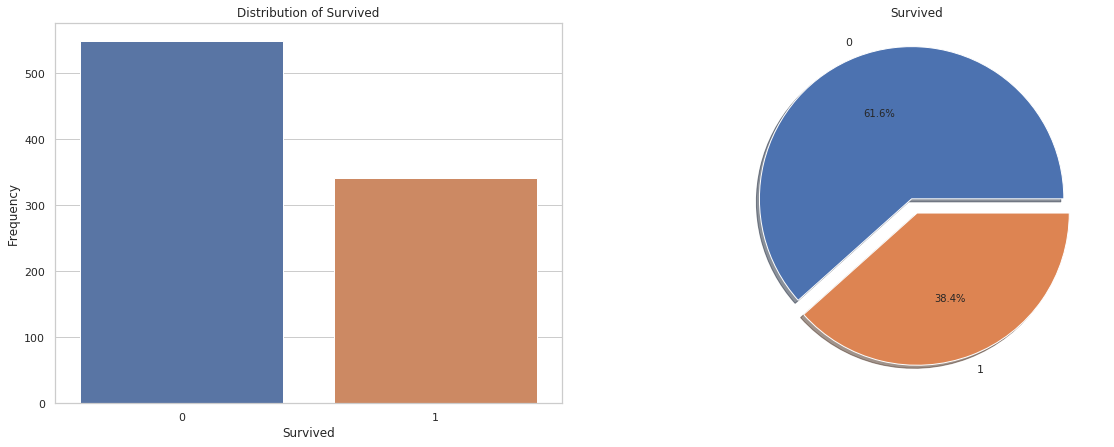

In [9]:
# Plot the Column: Pclass

agg = train.groupby(['Survived'], as_index=False).agg({'PassengerId':'count'})

plt.figure(figsize=(20,7)) # Define figure size

# Check the total distribution
plt.subplot(1,2,1)

sns.barplot(x='Survived', y='PassengerId', data=agg)

plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Frequency')

# Check the distribution on different Survived
plt.subplot(1,2,2)

plt.pie(
    agg['PassengerId'], 
    explode=[0.1, 0], 
    labels=agg['Survived'], 
    autopct="%1.1f%%", 
    pctdistance=0.6, 
    shadow=True, 
    labeldistance=1.1
)
plt.title("Survived")

plt.show()

### Pclass
pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

Summary:
- No Missing
- 1st has 24.2%; 2nd has 20.7%; 3rd has 55.1%
- Among each Pclass, most of people in 1st are survivied

In [10]:
print ("Has Nans:", train['Pclass'].hasnans)

Has Nans: False


In [11]:
train['Pclass'].unique()

array([3, 1, 2])

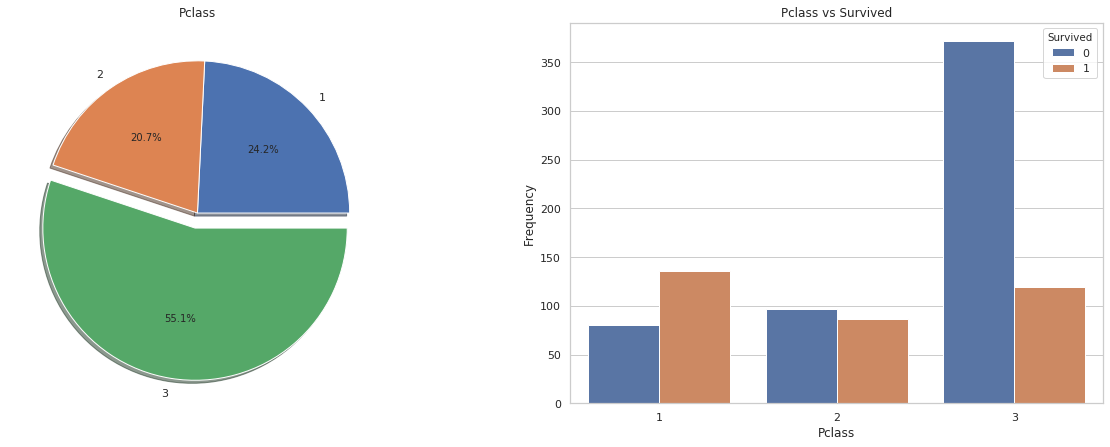

In [12]:
# Plot the Column: Pclass

plt.figure(figsize=(21,7)) # Define figure size

# Check the total distribution
plt.subplot(1,2,1)

agg = train.groupby(['Pclass'], as_index=False).agg({'PassengerId':'count'})

# sns.barplot(x='Pclass', y='PassengerId', data=agg)
# plt.title('Distribution of Pclass')
# plt.xlabel('Pclass')
# plt.ylabel('Frequency')
plt.pie(
    agg['PassengerId'], 
    explode=[0., 0., 0.1], 
    labels=agg['Pclass'], 
    autopct="%1.1f%%", 
    pctdistance=0.6, 
    shadow=True, 
    labeldistance=1.1
)
plt.title("Pclass")

# Check the distribution on different Survived
plt.subplot(1,2,2)

agg = train.groupby(['Pclass', 'Survived'], as_index=False).agg({'PassengerId':'count'})
sns.barplot(x='Pclass', y='PassengerId', hue='Survived', data=agg)

plt.title('Pclass vs Survived')
plt.xlabel('Pclass')
plt.ylabel('Frequency')

plt.show()

### Name

Summary:
- No Missing
- Check the Initial: 

 'Capt.', 'Col.', 'Countess.', 'Don.', 'Dr.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.','Mrs.', 'Ms.', 'Rev.', 'Sir.'

   Convert into:

   'Mr.', 'Master.', 'Mrs.', 'Miss.', 'Other.'

   Rule Following:

   ```
   .replace(
    ['Capt.', 'Col.', 'Countess.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Ms.', 'Rev.', 'Sir.'],
    ['Mr.', 'Other.', 'Other.', 'Other.', 'Other.', 'Other.', 'Miss.', 'Mr.', 'Master.', 'Miss.', 'Miss.', 'Miss.', 'Miss.', 'Mr.', 'Mr.'],
    inplace=True
)
```

In [13]:
print ("Has Nans:", train['Name'].hasnans)

Has Nans: False


In [14]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [0]:
train['Init'] = train['Name'].apply(lambda name: re.findall(r'([a-zA-Z]+\.)', name)[0])

In [16]:
agg = train.groupby(['Init', 'Sex'], as_index=False).agg({'PassengerId':'count'})

agg.pivot(index='Sex',columns='Init',values='PassengerId')

Init,Capt.,Col.,Countess.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
Sex,,,,,,,,,,,,,,,,,
female,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,182.0,2.0,1.0,NaN,125.0,1.0,NaN,NaN
male,1.0,2.0,NaN,1.0,6.0,1.0,NaN,2.0,40.0,NaN,NaN,NaN,517.0,NaN,NaN,6.0,1.0


In [17]:
agg.Init.values

array(['Capt.', 'Col.', 'Countess.', 'Don.', 'Dr.', 'Dr.', 'Jonkheer.',
       'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.',
       'Mrs.', 'Ms.', 'Rev.', 'Sir.'], dtype=object)

In [0]:
train['Init'].replace(
    ['Capt.', 'Col.', 'Countess.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Ms.', 'Rev.', 'Sir.'],
    ['Mr.', 'Other.', 'Other.', 'Other.', 'Other.', 'Other.', 'Miss.', 'Mr.', 'Master.', 'Miss.', 'Miss.', 'Miss.', 'Miss.', 'Mr.', 'Mr.'],
    inplace=True
)

In [19]:
agg = train.groupby(['Init', 'Sex'], as_index=False).agg({'PassengerId':'count'})

agg.pivot(index='Sex',columns='Init',values='PassengerId')

Init,Master.,Miss.,Mr.,Mrs.,Other.
Sex,,,,,
female,NaN,187.0,NaN,125.0,2.0
male,40.0,NaN,527.0,NaN,10.0


### Sex

Summary:
- No Missing
- male has 64.8%; female has 35.2%
- most of female are survivied

In [20]:
print ("Has Nans:", train['Sex'].hasnans)

Has Nans: False


In [21]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

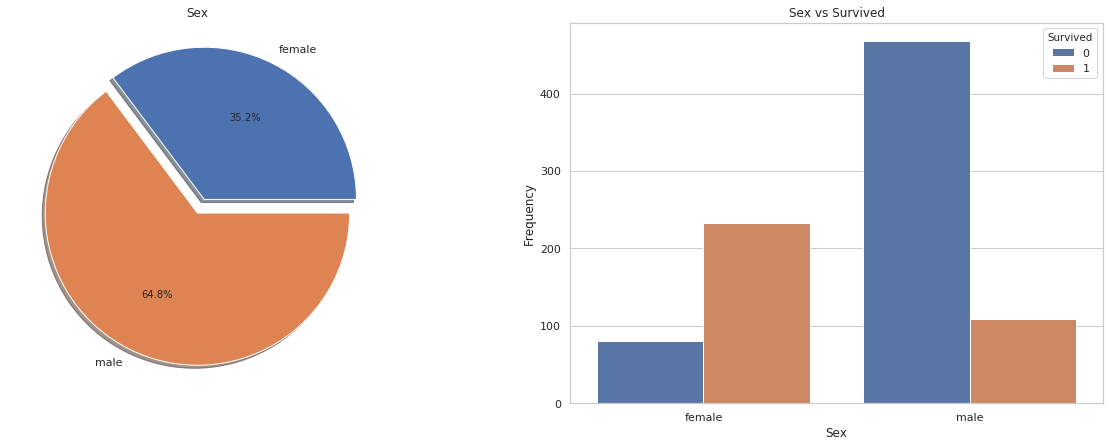

In [22]:
# Plot the Column: Sex

plt.figure(figsize=(21,7)) # Define figure size

# Check the total distribution
plt.subplot(1,2,1)

agg = train.groupby(['Sex'], as_index=False).agg({'PassengerId':'count'})

plt.pie(
    agg['PassengerId'], 
    explode=[0.1, 0], 
    labels=agg['Sex'], 
    autopct="%1.1f%%", 
    pctdistance=0.6, 
    shadow=True, 
    labeldistance=1.1
)
plt.title("Sex")


# Check the distribution on different Survived
plt.subplot(1,2,2)

agg = train.groupby(['Sex', 'Survived'], as_index=False).agg({'PassengerId':'count'})
sns.barplot(x='Sex', y='PassengerId', hue='Survived', data=agg)

plt.title('Sex vs Survived')
plt.xlabel('Sex')
plt.ylabel('Frequency')

plt.show()

### Age

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

Summary:
- 19.87% Missing 
- Age from 0.42 to 80.0, mean is 29.70

In [23]:
print ("Has Nans: {:s},".format(str(train['Age'].hasnans)),
       "{:.2f}% of Nans".format((1 - train['Age'].dropna().shape[0] / train.shape[0])*100))

Has Nans: True, 19.87% of Nans


In [24]:
print ("Max age:", train['Age'].max())
print ("Min age:", train['Age'].min())
print ("Mean age:", train['Age'].mean())

Max age: 80.0
Min age: 0.42
Mean age: 29.69911764705882


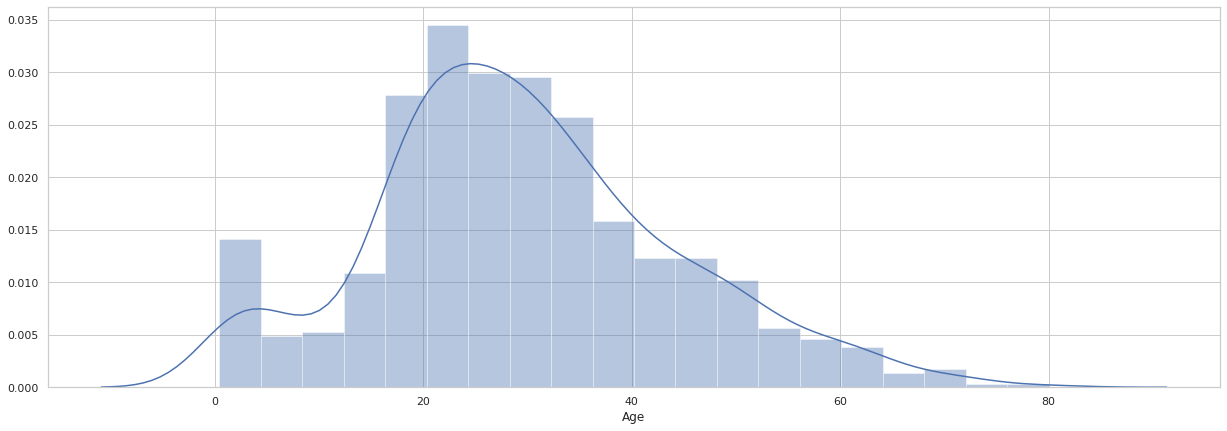

In [25]:
plt.figure(figsize=(21,7)) # Define figure size

sns.distplot(train['Age'],)

plt.show()

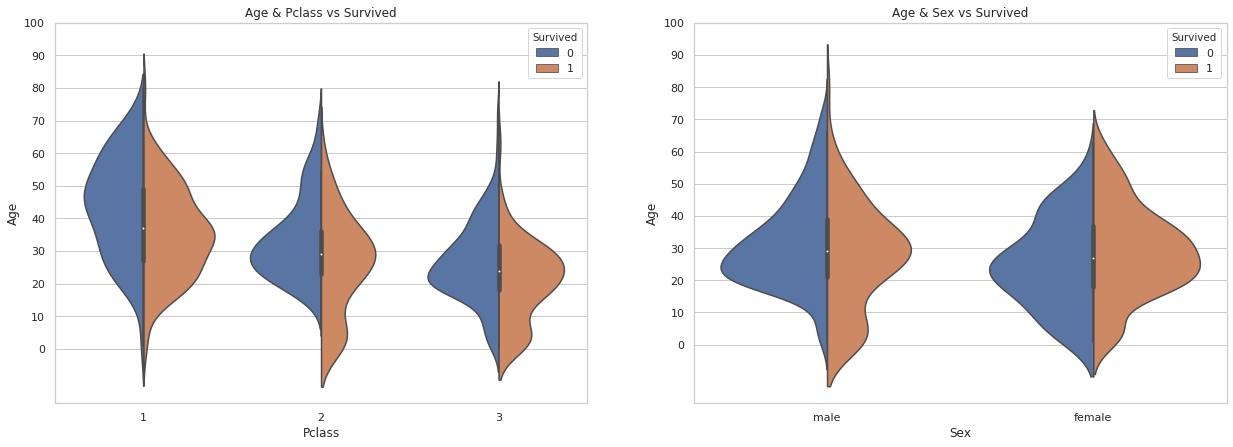

In [26]:
# Plot the Column: Age

plt.figure(figsize=(21,7)) # Define figure size

# Check the total distribution
plt.subplot(1,2,1)

sns.violinplot("Pclass","Age", hue="Survived", data=train, split=True)

plt.title('Age & Pclass vs Survived')
plt.yticks(range(0,110,10))

# Check the distribution on different Survived
plt.subplot(1,2,2)

sns.violinplot("Sex","Age", hue="Survived", data=train, split=True)

plt.title('Age & Sex vs Survived')
plt.yticks(range(0,110,10))

plt.show()

### SibSp

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

Summary:
- No Missing
- Value: 0, 1, 2, 3, 4, 5, 8

In [27]:
print ("Has Nans:", train['SibSp'].hasnans)

Has Nans: False


In [28]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

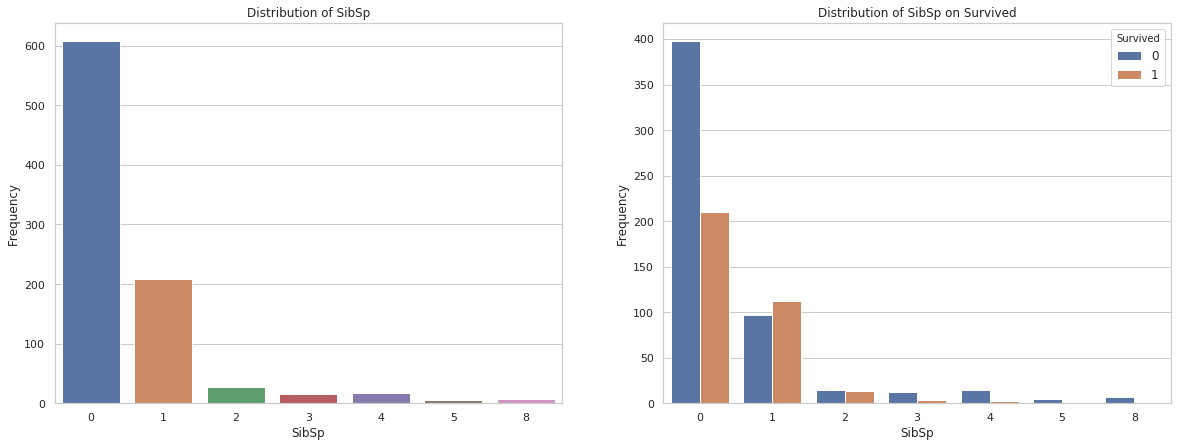

In [29]:
# Plot the Column: SibSp

plt.figure(figsize=(20,7)) # Define figure size

# Check the total distribution
plt.subplot(1,2,1)

agg = train.groupby(['SibSp'], as_index=False).agg({'PassengerId':'count'})
sns.barplot(x='SibSp', y='PassengerId', data=agg)

plt.title('Distribution of SibSp')
plt.xlabel('SibSp')
plt.ylabel('Frequency')

# Check the distribution on different Survived
plt.subplot(1,2,2)

agg = train.groupby(['SibSp', 'Survived'], as_index=False).agg({'PassengerId':'count'})
sns.barplot(x='SibSp', y='PassengerId', hue='Survived', data=agg)

plt.title('Distribution of SibSp on Survived')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.legend(loc='upper right', fontsize='large', title='Survived')

plt.show()

### Parch

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

Summary:
- No Missing
- Value: 0, 1, 2, 3, 4, 5, 6

In [30]:
print ("Has Nans:", train['Parch'].hasnans)

Has Nans: False


In [31]:
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

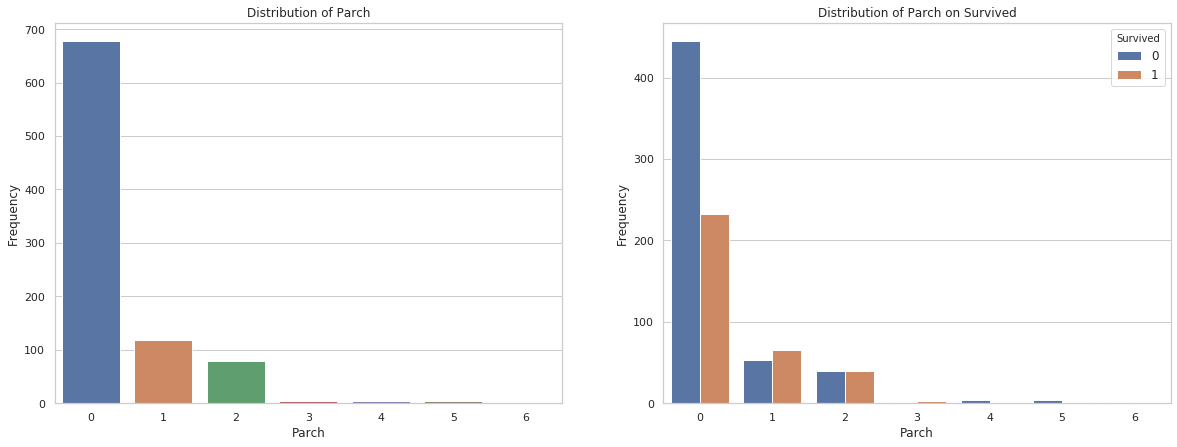

In [32]:
# Plot the Column: Parch

plt.figure(figsize=(20,7)) # Define figure size

# Check the total distribution
plt.subplot(1,2,1)

agg = train.groupby(['Parch'], as_index=False).agg({'PassengerId':'count'})
sns.barplot(x='Parch', y='PassengerId', data=agg)

plt.title('Distribution of Parch')
plt.xlabel('Parch')
plt.ylabel('Frequency')

# Check the distribution on different Survived
plt.subplot(1,2,2)

agg = train.groupby(['Parch', 'Survived'], as_index=False).agg({'PassengerId':'count'})
sns.barplot(x='Parch', y='PassengerId', hue='Survived', data=agg)

plt.title('Distribution of Parch on Survived')
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.legend(loc='upper right', fontsize='large', title='Survived')

plt.show()

### Ticket

In [33]:
print ("Has Nans:", train['Ticket'].hasnans)

Has Nans: False


In [34]:
len(train['Ticket'].unique()) / train.shape[0]

0.7643097643097643

### Fare

In [35]:
print ("Has Nans:", train['Fare'].hasnans)

Has Nans: False


In [36]:
len(train['Fare'].unique()) / train.shape[0]

0.2783389450056117

In [37]:
print ("Max Fare:", train['Fare'].max())
print ("Min Fare:", train['Fare'].min())

Max Fare: 512.3292
Min Fare: 0.0


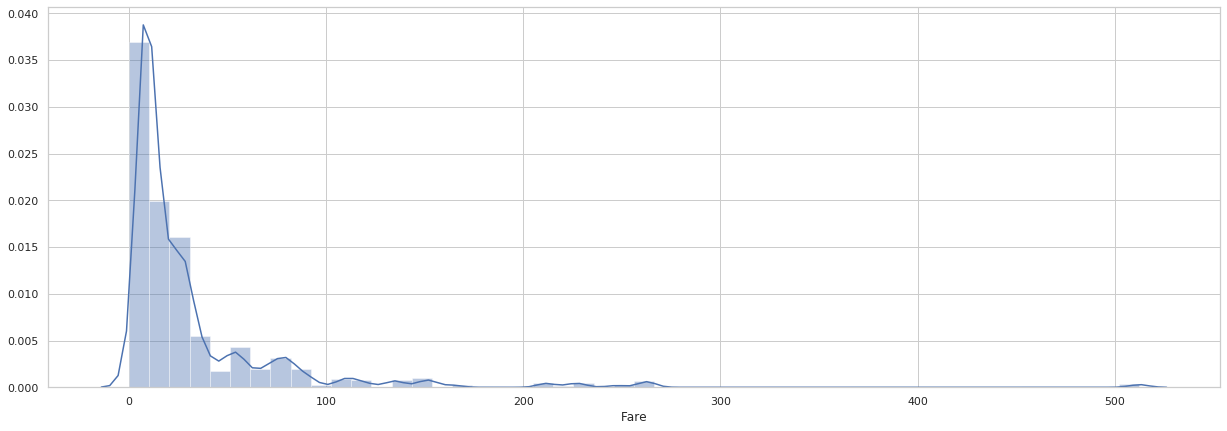

In [38]:
plt.figure(figsize=(21,7)) # Define figure size

sns.distplot(train['Fare'],)

plt.show()

### Cabin

Summary:

- 77.1% of value are MISSING -> Drop it

In [39]:
print ("Has Nans: {:s},".format(str(train['Cabin'].hasnans)),
       "{:.2f}% of Nans".format((1 - train['Cabin'].dropna().shape[0] / train.shape[0])*100))

Has Nans: True, 77.10% of Nans


### Embarked

- C = Cherbourg;
- Q = Queenstown;
- S = Southampton

Summary:

- 0.22% of value are MISSING.
- most value is  `S` -> fill in the nan

In [40]:
print ("Has Nans: {:s},".format(str(train['Embarked'].hasnans)),
       "{:.2f}% of Nans".format((1 - train['Embarked'].dropna().shape[0] / train.shape[0])*100))

Has Nans: True, 0.22% of Nans


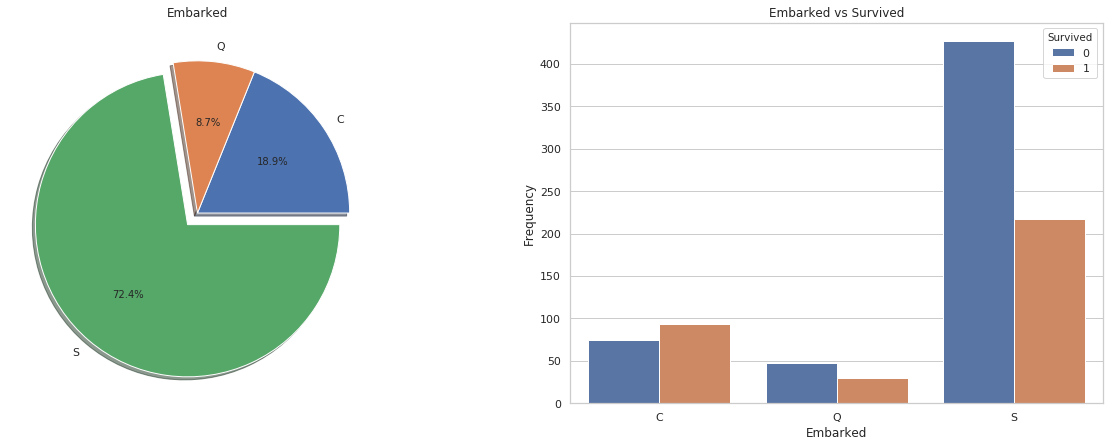

In [41]:
# Plot the Column: Sex

plt.figure(figsize=(21,7)) # Define figure size

# Check the total distribution
plt.subplot(1,2,1)

agg = train.groupby(['Embarked'], as_index=False).agg({'PassengerId':'count'})

plt.pie(
    agg['PassengerId'], 
    explode=[0, 0, 0.1], 
    labels=agg['Embarked'], 
    autopct="%1.1f%%", 
    pctdistance=0.6, 
    shadow=True, 
    labeldistance=1.1
)
plt.title("Embarked")


# Check the distribution on different Survived
plt.subplot(1,2,2)

agg = train.groupby(['Embarked', 'Survived'], as_index=False).agg({'PassengerId':'count'})
sns.barplot(x='Embarked', y='PassengerId', hue='Survived', data=agg)

plt.title('Embarked vs Survived')
plt.xlabel('Embarked')
plt.ylabel('Frequency')

plt.show()

## Data Clean

In [42]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Init
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Mr.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.


In [43]:
# Split the Features and Label
y_train_ = train['Survived']
x_train = train.drop(['Survived'], axis=1)

# Concat the training and test feature
features = pd.concat([x_train, test], sort=False, ignore_index=True)

######################
# Clean the Features #
######################

# Extract the Init from Name 
features['Init'] = features['Name'].apply(lambda name: re.findall(r'([a-zA-Z]+\.)', name)[0])

# Convert the Init to the following categories:
# 'Mr.', 'Master.', 'Mrs.', 'Miss.', 'Other.'
features['Init'].replace(
    ['Capt.', 'Col.', 'Countess.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Ms.', 'Rev.', 'Sir.', 'Dona.'],
    ['Mr.', 'Other.', 'Other.', 'Other.', 'Other.', 'Other.', 'Miss.', 'Mr.', 'Master.', 'Miss.', 'Miss.', 'Miss.', 'Miss.', 'Mr.', 'Mr.', 'Other.'],
    inplace=True
)

# Fill the Nans in Age
features['Age'] = features['Age'].fillna(train['Age'].mean())
# features['Fare'] = features['Fare'].fillna(train['Fare'].mean())

# Convert the Age to 4 groups
features['Age_band']=0 # Initial a new column
features.loc[(features['Age']>20)&(features['Age']<=40), 'Age_band']=1
features.loc[(features['Age']>40)&(features['Age']<=60), 'Age_band']=2
features.loc[features['Age']>60, 'Age_band']=3

# Onehot encoding
onehot = pd.get_dummies(features[['Sex','Init','Embarked']],prefix=['Sex','Init','Embarked'])
features = features[['Pclass', 'Age_band', 'SibSp', 'Parch']]
features_onehot = pd.merge(features,onehot,left_index=True,right_index=True)

features_onehot


,Pclass,Age_band,SibSp,Parch,Sex_female,Sex_male,Init_Master.,Init_Miss.,Init_Mr.,Init_Mrs.,Init_Other.,Embarked_C,Embarked_Q,Embarked_S
0,3,1,1,0,0,1,0,0,1,0,0,0,0,1
1,1,1,1,0,1,0,0,0,0,1,0,1,0,0
2,3,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,1,1,0,1,0,0,0,0,1,0,0,0,1
4,3,1,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,1,0,0,0,1,0,0,1,0,0,0,0,1
1305,1,1,0,0,1,0,0,0,0,0,1,1,0,0
1306,3,1,0,0,0,1,0,0,1,0,0,0,0,1
1307,3,1,0,0,0,1,0,0,1,0,0,0,0,1


In [0]:
x_train_ = features_onehot.iloc[:x_train.shape[0]]
x_test_ = features_onehot.iloc[x_train.shape[0]:]

## Modeling

Classification Algorithms includes:
- Logistic Regression
- Decision Tree
- Random Forest
- ...

### Logistic Regression

First is Sigmoid Function:
$$g(z) = \frac{1}{1+e^{-z}}$$

You can find the details on [Wiki](https://en.wikipedia.org/wiki/Sigmoid_function).

Logistic Regression is to add a Sigmoid function after the Linear Regression

$h_{\theta}=g(\theta^Tx)$, where $g(z)=\frac{1}{1+e^{-z}}$

Therefore, the formula of Logistic Regression is:
$$h_{\theta}=\frac{1}{1+e^{-\theta^Tx}}$$

### Decision Tree

The simple example is to decide whether to bring an umbrella or not. If the forecast shows it will rain, then you will bring the umbrella. If it is sunny, you will not bring it.

### Ensamble

To use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

- Bagging
- Boosting

Random Forest is Bagging.

In [0]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, normalize

from sklearn.model_selection import cross_validate, cross_val_score

In [46]:
LR = LogisticRegression(random_state=0)
DT = DecisionTreeClassifier(random_state=0)
RF = RandomForestClassifier(random_state=0)

LR_CV_scores = cross_val_score(LR, x_train_, y_train_, cv=10)
DT_CV_scores = cross_val_score(DT, x_train_, y_train_, cv=10)
RF_CV_scores = cross_val_score(RF, x_train_, y_train_, cv=10)

print("Logistic Regression:\n>> Accuracy: %0.2f (+/- %0.2f)" % (LR_CV_scores.mean(), LR_CV_scores.std() * 2))
print("Decision Tree:\n>> Accuracy: %0.2f (+/- %0.2f)" % (DT_CV_scores.mean(), DT_CV_scores.std() * 2))
print("Random Forest:\n>> Accuracy: %0.2f (+/- %0.2f)" % (RF_CV_scores.mean(), RF_CV_scores.std() * 2))

Logistic Regression:
>> Accuracy: 0.83 (+/- 0.06)
Decision Tree:
>> Accuracy: 0.81 (+/- 0.07)
Random Forest:
>> Accuracy: 0.80 (+/- 0.07)


In [47]:

# Model 1
# Logistic Regression
clf = LogisticRegressionCV(cv=5, random_state=0)

clf.fit(x_train_, y_train_)
print (clf.score(x_train_, y_train_))

test['Survived'] = clf.predict(x_test_) # 0.78468 for Kaggle Public Leaderboard

submission = test[['PassengerId','Survived']]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8338945005611672
